## 📘 02_preprocessing.ipynb – Imputación y tratamiento de valores atípicos

Este notebook contiene el preprocesamiento del dataset de diabetes, incluyendo:

- Reemplazo de valores no válidos.
- Imputación de valores faltantes.
- Detección visual de outliers.
- Exportación del dataset limpio para uso posterior.

### 1. Carga del dataset y configuración de librerías

Importamos las librerías necesarias y visualizamos las primeras filas del conjunto de datos.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo gráfico
sns.set(style="whitegrid")
%matplotlib inline

# Cargar el dataset limpio desde la ruta relativa
df = pd.read_csv("../data/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### 2. Detección de valores inválidos (ceros)

Algunas variables biométricas no pueden tener valores igual a cero. A continuación identificamos cuántos ceros hay en las columnas críticas.


In [2]:
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ver cuántos ceros hay en cada una
df[columns_with_zeros].eq(0).sum()


Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

### 3. Reemplazo de ceros por valores faltantes

Reemplazamos los ceros por `NaN` para poder imputarlos posteriormente.


In [3]:
df[columns_with_zeros] = df[columns_with_zeros].replace(0, np.nan)
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

### 4. Imputación de valores faltantes usando mediana

La mediana es preferida porque es robusta ante valores extremos (outliers).


In [4]:
df[columns_with_zeros] = df[columns_with_zeros].fillna(df[columns_with_zeros].median())
df.isnull().sum()

# Verificar si los valores han sido reemplazados correctamente
df[columns_with_zeros].eq(0).sum()


Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

### 5. Visualización de posibles valores atípicos (outliers)

Usamos boxplots para detectar visualmente si existen valores atípicos en las variables.


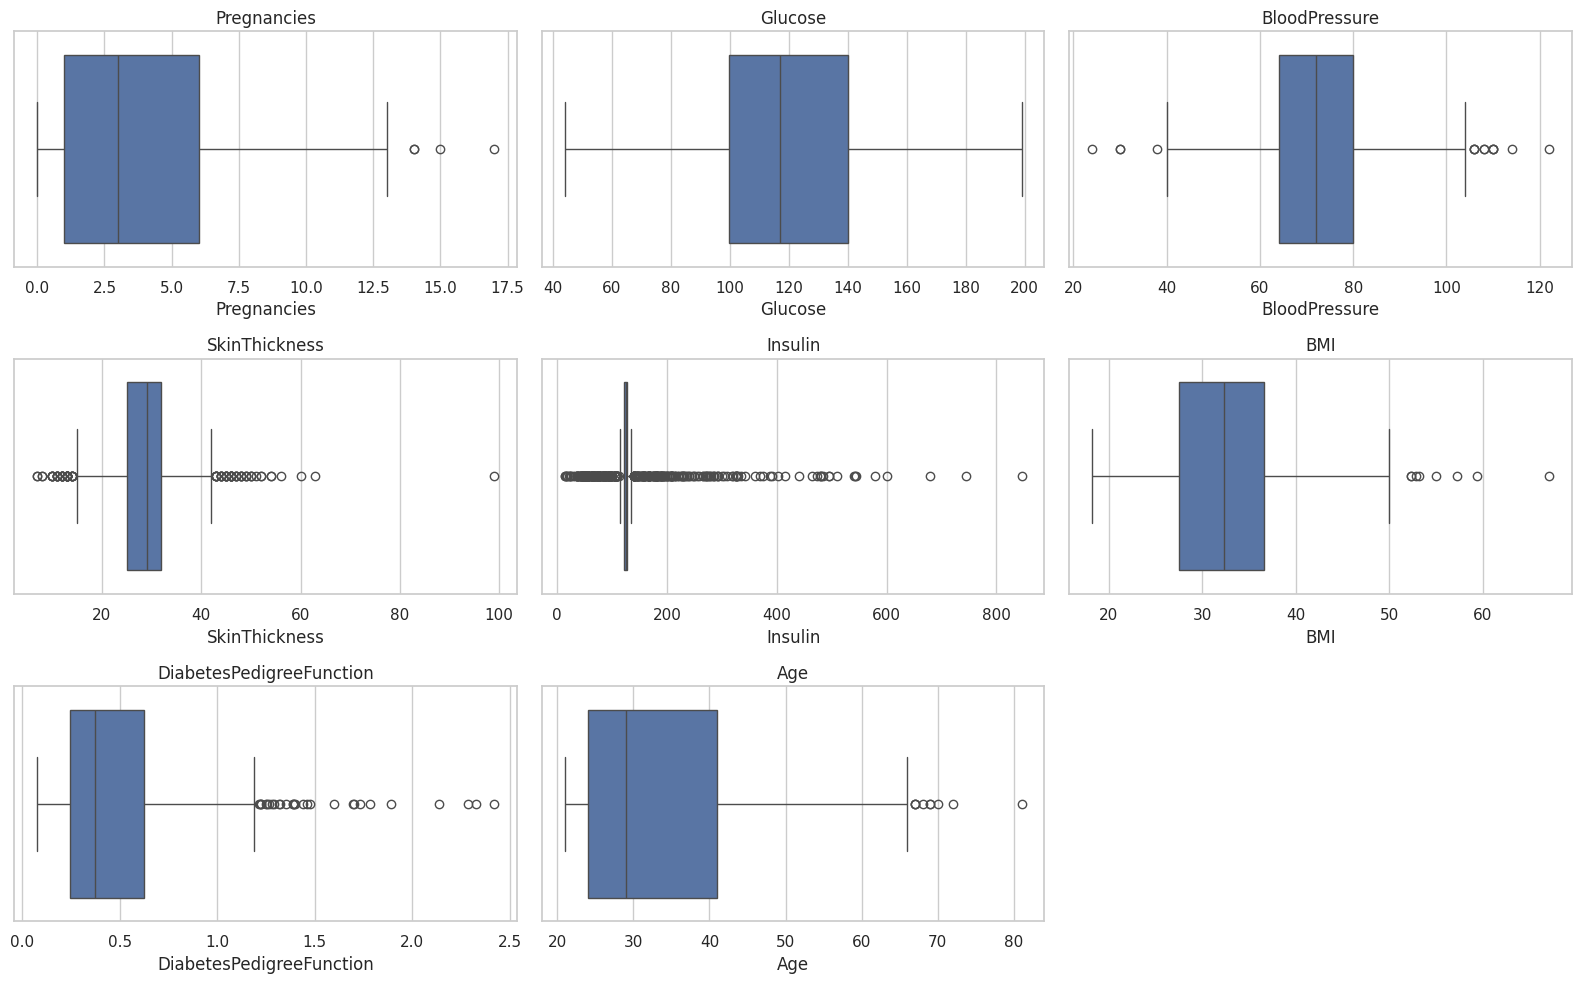

In [7]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(df.columns[:-1]):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


### 6. Distribución de variables imputadas

Visualizamos cómo quedaron distribuidas las variables después de la imputación.


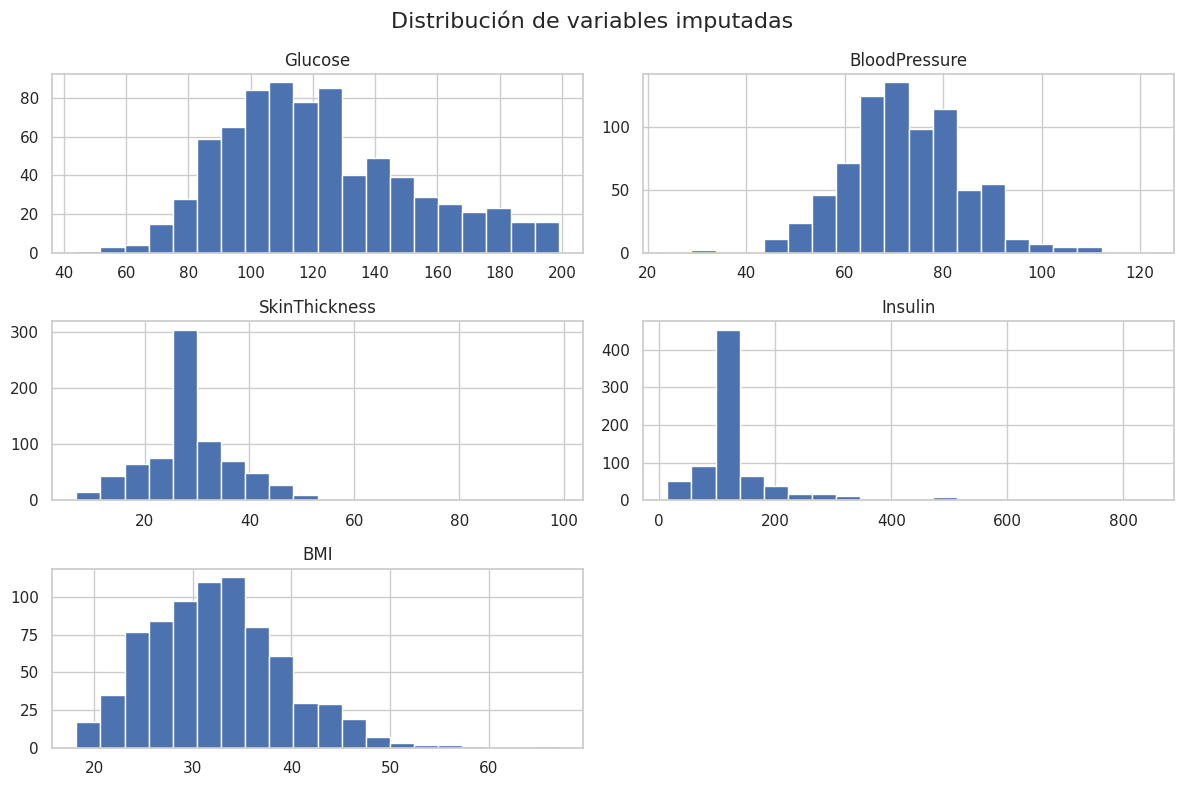

In [9]:
df[columns_with_zeros].hist(figsize=(12, 8), bins=20)
plt.suptitle("Distribución de variables imputadas", fontsize=16)
plt.tight_layout()
plt.show()


### 7. Guardar el dataset limpio

Exportamos el nuevo dataset para usarlo en el siguiente paso de entrenamiento del modelo.


In [6]:
df.to_csv("../data/diabetes_clean.csv", index=False)
print("✅ Dataset limpio guardado como 'diabetes_clean.csv'")
# Verificar si el archivo se ha guardado correctamente
saved_df = pd.read_csv("../data/diabetes_clean.csv")
saved_df.head()

✅ Dataset limpio guardado como 'diabetes_clean.csv'


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


### ✅ Conclusiones

- Se identificaron y reemplazaron valores inválidos en las variables clave (valores de cero).
- Se imputaron los valores faltantes utilizando la mediana.
- Se visualizaron valores atípicos sin eliminarlos (serán considerados más adelante).
- El nuevo dataset se guardó como `diabetes_clean.csv`.
